In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [193]:
train = pd.read_excel(r"E:/Desktop/Projects/ML Dataset/Airline_Fare_Prediction/Train.xlsx", engine='openpyxl')
test = pd.read_excel(r"E:/Desktop/Projects/ML Dataset/Airline_Fare_Prediction/Test.xlsx", engine='openpyxl')
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [194]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [195]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [196]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [197]:
test['Total_Stops'].isnull().value_counts(), train['Total_Stops'].isnull().value_counts()

(False    2671
 Name: Total_Stops, dtype: int64,
 False    10682
 True         1
 Name: Total_Stops, dtype: int64)

In [198]:
train['Total_Stops'] = train['Total_Stops'].fillna('1 stop')

In [199]:
test['Total_Stops'].isnull().value_counts(), train['Total_Stops'].isnull().value_counts()

(False    2671
 Name: Total_Stops, dtype: int64,
 False    10683
 Name: Total_Stops, dtype: int64)

In [200]:
train = train.drop(columns = ["Route"])
test = test.drop(columns = ["Route"])

In [201]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,No info,13302


In [202]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [203]:
train["Airline"].unique(), train["Airline"].nunique()

(array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
        'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
        'Vistara Premium economy', 'Jet Airways Business',
        'Multiple carriers Premium economy', 'Trujet'], dtype=object),
 12)

In [204]:
train["Source"].nunique(), train["Destination"].nunique()

(5, 6)

In [205]:
import datetime

In [206]:
train["Date_of_Journey"] = pd.to_datetime(train["Date_of_Journey"])
test["Date_of_Journey"] = pd.to_datetime(test["Date_of_Journey"])

In [207]:
# Extracting Year, Month and Day from Date of Journey column for both train and test
train["Date_of_Journey_Year"] = train["Date_of_Journey"].dt.year
train["Date_of_Journey_Month"] = train["Date_of_Journey"].dt.month
train["Date_of_Journey_Day"] = train["Date_of_Journey"].dt.day

# For test 
test["Date_of_Journey_Year"] = test["Date_of_Journey"].dt.year
test["Date_of_Journey_Month"] = test["Date_of_Journey"].dt.month
test["Date_of_Journey_Day"] = test["Date_of_Journey"].dt.day

In [208]:
train = train.drop(columns = "Date_of_Journey")
test = test.drop(columns = "Date_of_Journey")

In [209]:
train.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_Year,Date_of_Journey_Month,Date_of_Journey_Day
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019,3,24
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662,2019,1,5
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882,2019,9,6
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218,2019,12,5
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,No info,13302,2019,1,3


In [210]:
test.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Date_of_Journey_Year,Date_of_Journey_Month,Date_of_Journey_Day
0,Jet Airways,Delhi,Cochin,17:30,04:25 07 Jun,10h 55m,1 stop,No info,2019,6,6
1,IndiGo,Kolkata,Banglore,06:20,10:20,4h,1 stop,No info,2019,12,5
2,Jet Airways,Delhi,Cochin,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,2019,5,21
3,Multiple carriers,Delhi,Cochin,08:00,21:00,13h,1 stop,No info,2019,5,21
4,Air Asia,Banglore,Delhi,23:55,02:45 25 Jun,2h 50m,non-stop,No info,2019,6,24


In [211]:
train["Dep_Time"] = pd.to_datetime(train["Dep_Time"])
test["Dep_Time"] = pd.to_datetime(test["Dep_Time"])

In [212]:
train["Dep_Time_hour"] = train["Dep_Time"].dt.hour
train["Dep_Time_min"] = train["Dep_Time"].dt.minute

test["Dep_Time_hour"] = test["Dep_Time"].dt.hour
test["Dep_Time_min"] = test["Dep_Time"].dt.minute

In [213]:
train = train.drop(columns = "Dep_Time")
test = test.drop(columns = "Dep_Time")

In [214]:
train.head()

,Airline,Source,Destination,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_Year,Date_of_Journey_Month,Date_of_Journey_Day,Dep_Time_hour,Dep_Time_min
0,IndiGo,Banglore,New Delhi,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019,3,24,22,20
1,Air India,Kolkata,Banglore,13:15,7h 25m,2 stops,No info,7662,2019,1,5,5,50
2,Jet Airways,Delhi,Cochin,04:25 10 Jun,19h,2 stops,No info,13882,2019,9,6,9,25
3,IndiGo,Kolkata,Banglore,23:30,5h 25m,1 stop,No info,6218,2019,12,5,18,5
4,IndiGo,Banglore,New Delhi,21:35,4h 45m,1 stop,No info,13302,2019,1,3,16,50


In [215]:
test.head()

,Airline,Source,Destination,Arrival_Time,Duration,Total_Stops,Additional_Info,Date_of_Journey_Year,Date_of_Journey_Month,Date_of_Journey_Day,Dep_Time_hour,Dep_Time_min
0,Jet Airways,Delhi,Cochin,04:25 07 Jun,10h 55m,1 stop,No info,2019,6,6,17,30
1,IndiGo,Kolkata,Banglore,10:20,4h,1 stop,No info,2019,12,5,6,20
2,Jet Airways,Delhi,Cochin,19:00 22 May,23h 45m,1 stop,In-flight meal not included,2019,5,21,19,15
3,Multiple carriers,Delhi,Cochin,21:00,13h,1 stop,No info,2019,5,21,8,0
4,Air Asia,Banglore,Delhi,02:45 25 Jun,2h 50m,non-stop,No info,2019,6,24,23,55


In [216]:
train["Arrival_Time"] = pd.to_datetime(train["Arrival_Time"])
test["Arrival_Time"] = pd.to_datetime(test["Arrival_Time"])

In [217]:
train["Arrival_Time_hour"] = train["Arrival_Time"].dt.hour
train["Arrival_Time_min"] = train["Arrival_Time"].dt.minute

test["Arrival_Time_hour"] = test["Arrival_Time"].dt.hour
test["Arrival_Time_min"] = test["Arrival_Time"].dt.minute

In [218]:
train = train.drop(columns = "Arrival_Time")
test = test.drop(columns = "Arrival_Time")

In [219]:
train.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_Year,Date_of_Journey_Month,Date_of_Journey_Day,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897,2019,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,2019,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,19h,2 stops,No info,13882,2019,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,No info,6218,2019,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,No info,13302,2019,1,3,16,50,21,35


In [220]:
test.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Date_of_Journey_Year,Date_of_Journey_Month,Date_of_Journey_Day,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,Jet Airways,Delhi,Cochin,10h 55m,1 stop,No info,2019,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,4h,1 stop,No info,2019,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,23h 45m,1 stop,In-flight meal not included,2019,5,21,19,15,19,0
3,Multiple carriers,Delhi,Cochin,13h,1 stop,No info,2019,5,21,8,0,21,0
4,Air Asia,Banglore,Delhi,2h 50m,non-stop,No info,2019,6,24,23,55,2,45


In [221]:
# The duration column is in the form of string i.e. there is hours "h" and minutes "m". Therefore to change this into 
# minutes the following is to be done: - 

duration_train = list(train["Duration"])

for i in range (len(duration_train)):
    if len(duration_train[i].split())!=2: 
#To check if duration has both hours and minutes , if yes , implement the below logic
        if "h" in duration_train[i]:
            duration_train[i] = duration_train[i].strip() + " 0m"
        else:
            duration_train[i] = "0h " + duration_train[i]
            
duration_train_hours = []
duration_train_mins = []

for i in range(len(duration_train)):
    duration_train_hours.append(int(duration_train[i].split(sep = 'h')[0]))
    # To get hours in duration
    duration_train_mins.append(int(duration_train[i].split(sep = 'm')[0].split()[-1]))
    # To get minutes in duration
# -------------------------------------------------------------------------------------------------    

duration_test = list(test["Duration"])

for i in range (len(duration_test)):
    if len(duration_test[i].split())!=2: 
#To check if duration has both hours and minutes , if yes , implement the below logic
        if "h" in duration_test[i]:
            duration_test[i] = duration_test[i].strip() + " 0m"
        else:
            duration_test[i] = "0h " + duration_test[i]
            
duration_test_hours = []
duration_test_mins = []

for i in range(len(duration_test)):
    duration_test_hours.append(int(duration_test[i].split(sep = 'h')[0]))
    # To get hours in duration
    duration_test_mins.append(int(duration_test[i].split(sep = 'm')[0].split()[-1]))
    # To get minutes in duration

In [222]:
train['Duration_hours'] = duration_train_hours
train['Duration_minutes'] = duration_train_mins

#---------------------------------------------

test['Duration_hours'] = duration_test_hours
test['Duration_minutes'] = duration_test_mins

In [223]:
#Splitting duration  time

#a=df_train['Duration'].str.split(' ',expand=True)
#a[1].fillna('00m',inplace=True)
#df_train['dur_hr']=a[0].apply(lambda x: x[:-1])
#df_train['dur_min']=a[1].apply(lambda x: x[:-1])

In [224]:
train = train.drop(columns = "Duration")
test = test.drop(columns = "Duration")

In [225]:
train.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date_of_Journey_Year,Date_of_Journey_Month,Date_of_Journey_Day,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,2019,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,No info,7662,2019,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,2019,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,2019,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,2019,1,3,16,50,21,35,4,45


In [226]:
test.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Date_of_Journey_Year,Date_of_Journey_Month,Date_of_Journey_Day,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_minutes
0,Jet Airways,Delhi,Cochin,1 stop,No info,2019,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,1 stop,No info,2019,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,1 stop,In-flight meal not included,2019,5,21,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,1 stop,No info,2019,5,21,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,non-stop,No info,2019,6,24,23,55,2,45,2,50


In [227]:
train["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [228]:
test.isna().any()

Airline                  False
Source                   False
Destination              False
Total_Stops              False
Additional_Info          False
Date_of_Journey_Year     False
Date_of_Journey_Month    False
Date_of_Journey_Day      False
Dep_Time_hour            False
Dep_Time_min             False
Arrival_Time_hour        False
Arrival_Time_min         False
Duration_hours           False
Duration_minutes         False
dtype: bool

In [229]:
count_nan = len(train) - train.count()
count_nan

Airline                  0
Source                   0
Destination              0
Total_Stops              0
Additional_Info          0
Price                    0
Date_of_Journey_Year     0
Date_of_Journey_Month    0
Date_of_Journey_Day      0
Dep_Time_hour            0
Dep_Time_min             0
Arrival_Time_hour        0
Arrival_Time_min         0
Duration_hours           0
Duration_minutes         0
dtype: int64

In [230]:
train['Total_Stops'] = train['Total_Stops'].replace('non-stop', '0 stops')
test['Total_Stops'] = test['Total_Stops'].replace('non-stop', '0 stops')

In [231]:
# train = train.dropna(subset=['Total_Stops'])
# test = test.dropna(subset=['Total_Stops'])

train['Total_Stops'] = train['Total_Stops'].map({'0 stops': '0', '2 stops': '2', '1 stop': '1','3 stops': '3',
                                                 '4 stops': '4'})
test['Total_Stops'] = test['Total_Stops'].map({'0 stops': '0', '2 stops': '2', '1 stop': '1','3 stops': '3',
                                               '4 stops': '4'})

In [232]:
train.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date_of_Journey_Year,Date_of_Journey_Month,Date_of_Journey_Day,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,0,No info,3897,2019,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,No info,7662,2019,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,No info,13882,2019,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,No info,6218,2019,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,No info,13302,2019,1,3,16,50,21,35,4,45


In [233]:
train["Total_Stops"].isnull().value_counts()

False    10683
Name: Total_Stops, dtype: int64

In [234]:
count_nan = len(train) - train.count()
count_nan

Airline                  0
Source                   0
Destination              0
Total_Stops              0
Additional_Info          0
Price                    0
Date_of_Journey_Year     0
Date_of_Journey_Month    0
Date_of_Journey_Day      0
Dep_Time_hour            0
Dep_Time_min             0
Arrival_Time_hour        0
Arrival_Time_min         0
Duration_hours           0
Duration_minutes         0
dtype: int64

In [235]:
train["Additional_Info"].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [236]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Airline                10683 non-null  object
 1   Source                 10683 non-null  object
 2   Destination            10683 non-null  object
 3   Total_Stops            10683 non-null  object
 4   Additional_Info        10683 non-null  object
 5   Price                  10683 non-null  int64 
 6   Date_of_Journey_Year   10683 non-null  int64 
 7   Date_of_Journey_Month  10683 non-null  int64 
 8   Date_of_Journey_Day    10683 non-null  int64 
 9   Dep_Time_hour          10683 non-null  int64 
 10  Dep_Time_min           10683 non-null  int64 
 11  Arrival_Time_hour      10683 non-null  int64 
 12  Arrival_Time_min       10683 non-null  int64 
 13  Duration_hours         10683 non-null  int64 
 14  Duration_minutes       10683 non-null  int64 
dtypes: int64(10), objec

In [237]:
train.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date_of_Journey_Year,Date_of_Journey_Month,Date_of_Journey_Day,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,0,No info,3897,2019,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,No info,7662,2019,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,No info,13882,2019,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,No info,6218,2019,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,No info,13302,2019,1,3,16,50,21,35,4,45


In [238]:
train["Date_of_Journey_Year"].nunique(), test["Date_of_Journey_Year"].nunique()

(1, 1)

In [239]:
train["Source"].unique(), train["Destination"].unique()

(array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object),
 array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
       dtype=object))

In [240]:
train.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date_of_Journey_Year,Date_of_Journey_Month,Date_of_Journey_Day,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,0,No info,3897,2019,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,No info,7662,2019,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,No info,13882,2019,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,No info,6218,2019,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,No info,13302,2019,1,3,16,50,21,35,4,45


In [241]:
train["Additional_Info"].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
2 Long layover                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

In [242]:
(8344/10682)*100

78.1127129750983

In [243]:
train.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date_of_Journey_Year,Date_of_Journey_Month,Date_of_Journey_Day,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,0,No info,3897,2019,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,No info,7662,2019,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,No info,13882,2019,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,No info,6218,2019,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,No info,13302,2019,1,3,16,50,21,35,4,45


Text(0.5, 1.0, 'corr_train.corr()')

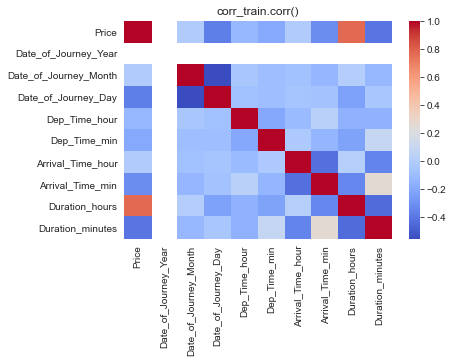

In [244]:
corr_train = train.corr()
sns.heatmap(corr_train.corr(),cmap='coolwarm')
plt.title('corr_train.corr()')

In [245]:
train = train.drop(columns = ["Date_of_Journey_Year","Additional_Info"])
test = test.drop(columns = ["Date_of_Journey_Year","Additional_Info"])

In [246]:
train.head()

,Airline,Source,Destination,Total_Stops,Price,Date_of_Journey_Month,Date_of_Journey_Day,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,0,3897,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [247]:
train["Date_of_Journey_Month"].unique()

array([ 3,  1,  9, 12,  6,  5,  4], dtype=int64)

Text(0.5, 1.0, 'Heatmap - Correlation plot')

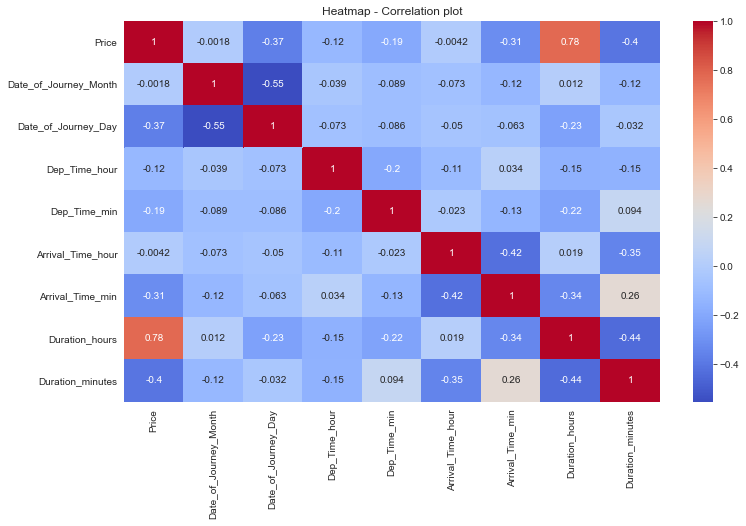

In [248]:
corr_train1 = train.corr()
plt.figure(figsize=(12,7))
sns.heatmap(corr_train1.corr(), cmap = "coolwarm", annot = True)
plt.title("Heatmap - Correlation plot")

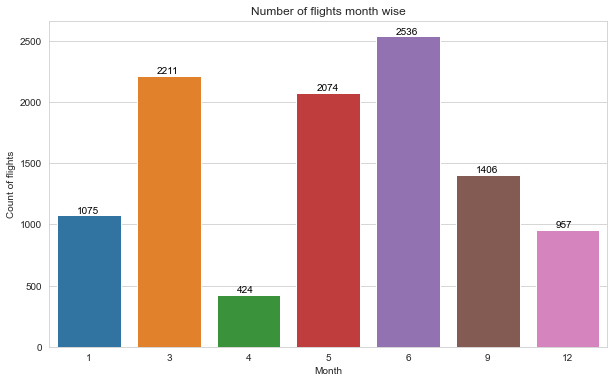

In [249]:
plt.figure(figsize = (10,6))
plt.title("Number of flights month wise")
ct = sns.countplot(x = "Date_of_Journey_Month", data = train)
plt.xlabel("Month")
plt.ylabel("Count of flights")
for p in ct.patches:
    ct.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

In [250]:
# From the above plot, we can understand that in april the number of flights are the least whereas the most in June.

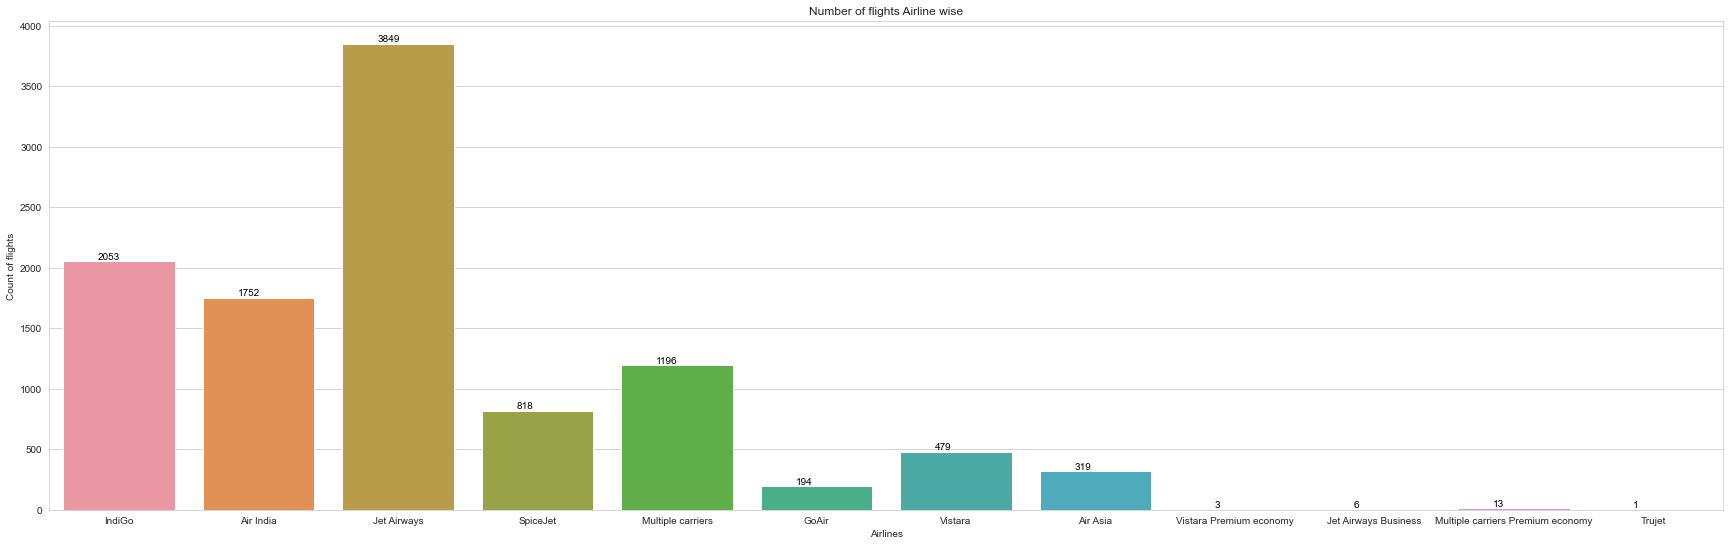

In [251]:
# Find count of flight airline wise

plt.figure(figsize = (30,9))
plt.title("Number of flights Airline wise")
ct = sns.countplot(x = "Airline", data = train)
plt.xlabel("Airlines")
plt.ylabel("Count of flights")
for p in ct.patches:
    ct.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

c:\users\kartik rayaprolu\anaconda3\envs\practice\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


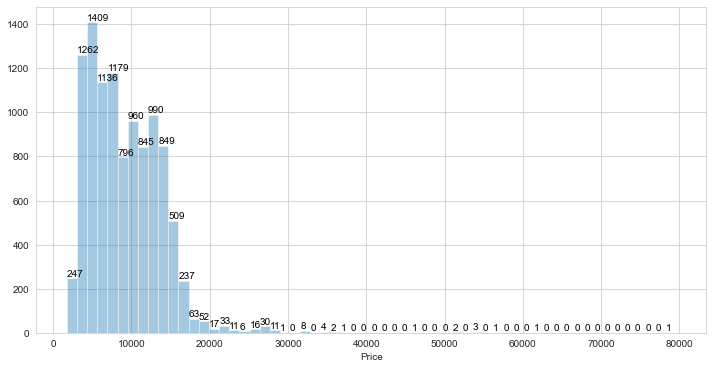

In [252]:
plt.figure(figsize = (12,6))
dp = sns.distplot(train["Price"], kde = False, bins = 60)
for p in dp.patches:
    dp.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

In [253]:
train["Total_Stops"].unique()

array(['0', '2', '1', '3', '4'], dtype=object)

In [254]:
train.head()

,Airline,Source,Destination,Total_Stops,Price,Date_of_Journey_Month,Date_of_Journey_Day,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,0,3897,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [255]:
train["Total_Stops"].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
10678    False
10679    False
10680    False
10681    False
10682    False
Name: Total_Stops, Length: 10683, dtype: bool

In [256]:
train.head()

,Airline,Source,Destination,Total_Stops,Price,Date_of_Journey_Month,Date_of_Journey_Day,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,0,3897,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [257]:
test.head()

,Airline,Source,Destination,Total_Stops,Date_of_Journey_Month,Date_of_Journey_Day,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_minutes
0,Jet Airways,Delhi,Cochin,1,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,1,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,1,5,21,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,1,5,21,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,0,6,24,23,55,2,45,2,50


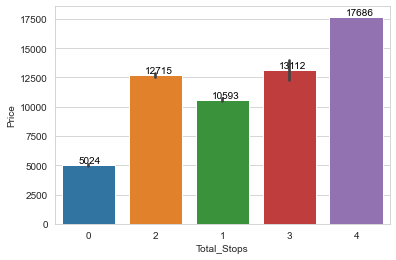

In [258]:
bp = sns.barplot(x = "Total_Stops", y = "Price", data = train)
for p in bp.patches:
    bp.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

(array([-10000.,      0.,  10000.,  20000.,  30000.,  40000.,  50000.,
         60000.,  70000.,  80000.,  90000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

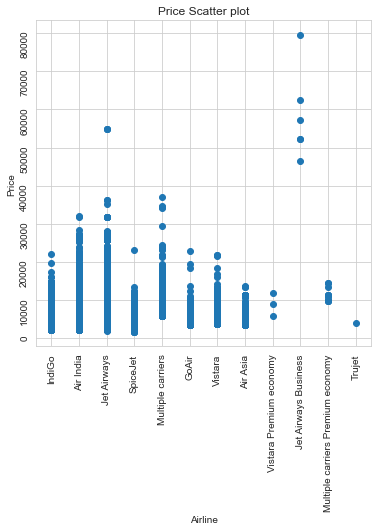

In [259]:
plt.figure(figsize = (6,6))
plt.title("Price Scatter plot")
plt.scatter(train["Airline"], train["Price"])
plt.xticks(rotation = 90)
plt.xlabel("Airline")
plt.ylabel("Price")
plt.yticks(rotation = 90)

In [260]:
# Lets combine the lest taken and classes or airlines and combine

train["Airline"] = train["Airline"].replace({"Vistara Premium economy":"Other", "Jet Airways Business":"Other", 
                                             "Multiple carriers Premium economy":"Other", "Trujet":"Other"})
test["Airline"] = test["Airline"].replace({"Vistara Premium economy":"Other", "Jet Airways":"Other", 
                                           "Multiple carriers Premium economy":"Other", "Trujet":"Other"})

In [261]:
train["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia', 'Other'],
      dtype=object)

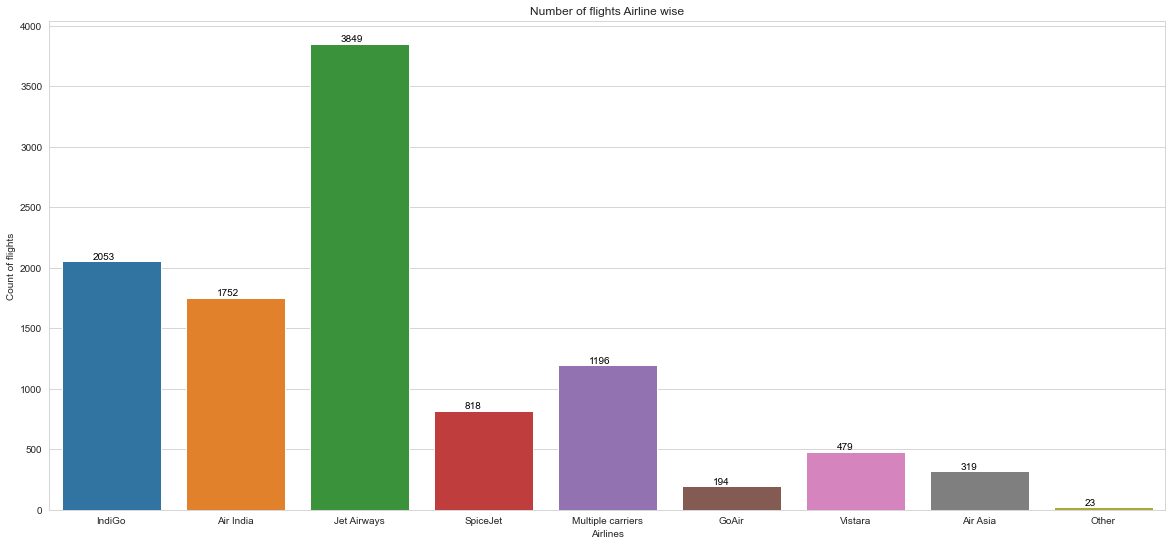

In [262]:
# Find count of flight airline wise

plt.figure(figsize = (20,9))
plt.title("Number of flights Airline wise")
ct = sns.countplot(x = "Airline", data = train)
plt.xlabel("Airlines")
plt.ylabel("Count of flights")
for p in ct.patches:
    ct.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

(array([-10000.,      0.,  10000.,  20000.,  30000.,  40000.,  50000.,
         60000.,  70000.,  80000.,  90000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

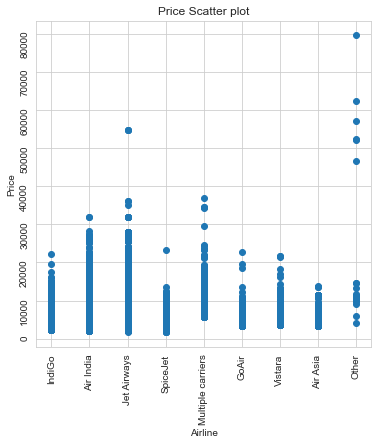

In [263]:
plt.figure(figsize = (6,6))
plt.title("Price Scatter plot")
plt.scatter(train["Airline"], train["Price"])
plt.xticks(rotation = 90)
plt.xlabel("Airline")
plt.ylabel("Price")
plt.yticks(rotation = 90)

<AxesSubplot:xlabel='Price', ylabel='Airline'>

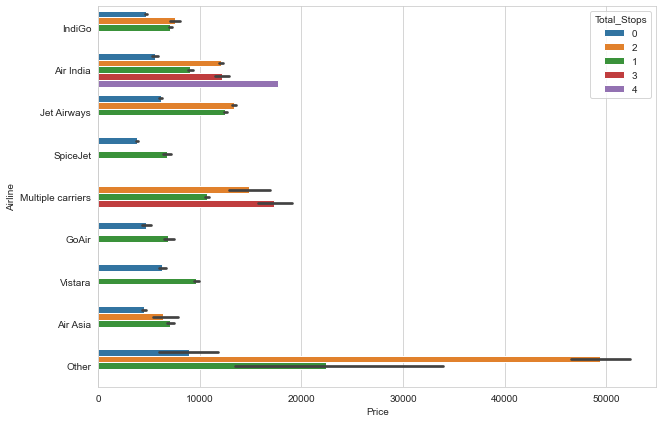

In [264]:
plt.figure(figsize=(10,7))
sns.barplot(y=train['Airline'],x=train['Price'],hue=train['Total_Stops'])

In [265]:
train.head()

,Airline,Source,Destination,Total_Stops,Price,Date_of_Journey_Month,Date_of_Journey_Day,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,0,3897,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [266]:
dummies = pd.get_dummies(train[["Airline","Source","Destination"]], drop_first = True)
train = train.drop(["Airline","Source","Destination"], axis = 1)
train = pd.concat([train,dummies], axis = 1)

# --------------------------------------------------------------------------------------

dummies = pd.get_dummies(test[["Airline","Source","Destination"]], drop_first = True)
test = test.drop(["Airline","Source","Destination"], axis = 1)
test = pd.concat([test,dummies], axis = 1)

In [267]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [268]:
train.head()

,Total_Stops,Price,Date_of_Journey_Month,Date_of_Journey_Day,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Other,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,3,24,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [273]:
train = train.rename({'Total_Stops':'Stops','Date_of_Journey_Month':'Month','Date_of_Journey_Day':'Date',
                      'Dep_Time_hour':'Dep_hour','Dep_Time_min':'Dep_min','Arrival_Time_hour':'Arr_hour',
                      'Arrival_Time_min':'Arr_mins','Duration_minutes':'Duration_mins','Airline_Air India':'Air_India',
                      'Airline_GoAir':'GoAir','Airline_IndiGo':'Indigo','Airline_Jet Airways':'Jet_Airways',
                      'Airline_Multiple carriers':'Mutiple_carriers','Airline_Other':'Other_airlines',
                      'Airline_SpiceJet':'Spicejet','Airline_Vistara':'Vistara','Source_Chennai':'S_Chennai',
                      'Source_Delhi':'S_Delhi','Source_Kolkata':'S_Kolkata','Source_Mumbai':'S_Mumbai',
                      'Destination_Cochin':'D_Cochin','Destination_Delhi':'D_Delhi','Destination_Hyderabad':'D_Hyderabad',
                      'Destination_Kolkata':'D_Kolkata','Destination_New Delhi':'D_New_Delhi'}, axis = 'columns')

In [274]:
train.head()

,Stops,Price,Month,Date,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air_India,GoAir,Indigo,Jet_Airways,Multiple_carriers,Other_Airlines,Spicejet,Vistara,S_Chennai,S_Delhi,S_Kolkata,S_Mumbai,D_Cochin,D_Delhi,D_Hyderabad,D_Kolkata,D_New_Delhi
0,0,3897,3,24,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [277]:
test = test.rename({'Total_Stops':'Stops','Date_of_Journey_Month':'Month','Date_of_Journey_Day':'Date',
                      'Dep_Time_hour':'Dep_hour','Dep_Time_min':'Dep_min','Arrival_Time_hour':'Arr_hour',
                      'Arrival_Time_min':'Arr_mins','Duration_minutes':'Duration_mins','Airline_Air India':'Air_India',
                      'Airline_GoAir':'GoAir','Airline_IndiGo':'Indigo','Airline_Jet Airways':'Jet_Airways',
                      'Airline_Multiple carriers':'Mutiple_carriers','Airline_Other':'Other_airlines',
                      'Airline_SpiceJet':'Spicejet','Airline_Vistara':'Vistara','Source_Chennai':'S_Chennai',
                      'Source_Delhi':'S_Delhi','Source_Kolkata':'S_Kolkata','Source_Mumbai':'S_Mumbai',
                      'Destination_Cochin':'D_Cochin','Destination_Delhi':'D_Delhi','Destination_Hyderabad':'D_Hyderabad',
                      'Destination_Kolkata':'D_Kolkata','Destination_New Delhi':'D_New_Delhi',
                      'Airline_Jet Airways Business':'Jet_Airways_Business'}, axis = 'columns')

In [278]:
test.head()

,Stops,Month,Date,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air_India,GoAir,Indigo,Jet_Airways_Business,Multiple_carriers,Other_Airlines,Spicejet,Vistara,S_Chennai,S_Delhi,S_Kolkata,S_Mumbai,D_Cochin,D_Delhi,D_Hyderabad,D_Kolkata,D_New_Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,5,21,19,15,19,0,23,45,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
3,1,5,21,8,0,21,0,13,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
4,0,6,24,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


**Feature Selection**

In [279]:
train.shape

(10683, 27)

In [280]:
test.shape

(2671, 26)

In [281]:
train

,Stops,Price,Month,Date,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air_India,GoAir,Indigo,Jet_Airways,Multiple_carriers,Other_Airlines,Spicejet,Vistara,S_Chennai,S_Delhi,S_Kolkata,S_Mumbai,D_Cochin,D_Delhi,D_Hyderabad,D_Kolkata,D_New_Delhi
0,0,3897,3,24,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,19,55,22,25,2,30,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10679,0,4145,4,27,20,45,23,20,2,35,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10680,0,7229,4,27,8,20,11,20,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
10681,0,12648,1,3,11,30,14,10,2,40,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [282]:
train.columns

Index(['Stops', 'Price', 'Month', 'Date', 'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours', 'Duration_mins', 'Air_India', 'GoAir', 'Indigo', 'Jet_Airways', 'Multiple_carriers', 'Other_Airlines', 'Spicejet', 'Vistara', 'S_Chennai', 'S_Delhi', 'S_Kolkata', 'S_Mumbai', 'D_Cochin', 'D_Delhi', 'D_Hyderabad', 'D_Kolkata', 'D_New_Delhi'], dtype='object')

In [286]:
X = train.loc[:,['Stops', 'Month', 'Date', 'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours', 
                 'Duration_mins', 'Air_India', 'GoAir', 'Indigo', 'Jet_Airways', 'Multiple_carriers', 'Other_Airlines', 
                 'Spicejet', 'Vistara', 'S_Chennai', 'S_Delhi', 'S_Kolkata', 'S_Mumbai', 'D_Cochin', 'D_Delhi', 
                 'D_Hyderabad', 'D_Kolkata', 'D_New_Delhi']]
X.head()

,Stops,Month,Date,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air_India,GoAir,Indigo,Jet_Airways,Multiple_carriers,Other_Airlines,Spicejet,Vistara,S_Chennai,S_Delhi,S_Kolkata,S_Mumbai,D_Cochin,D_Delhi,D_Hyderabad,D_Kolkata,D_New_Delhi
0,0,3,24,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [287]:
y = train.iloc[:, 1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [288]:
from sklearn.ensemble import ExtraTreesRegressor

In [289]:
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [290]:
print(selection.feature_importances_)

[0.20651604 0.0913188  0.11271644 0.02598608 0.02305983 0.02836402
 0.0207086  0.14741227 0.01780863 0.01267    0.00197064 0.02166062
 0.13553917 0.01841887 0.03567147 0.00373573 0.00546427 0.00059579
 0.01267955 0.00399629 0.00719976 0.00942188 0.01358918 0.00742212
 0.00061846 0.03545548]


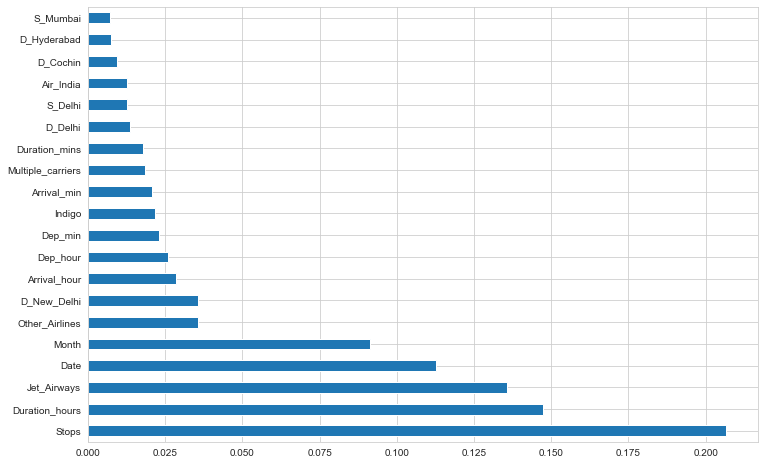

In [291]:
# Plot a graph showing the most significant variables 

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [292]:
X

,Stops,Month,Date,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air_India,GoAir,Indigo,Jet_Airways,Multiple_carriers,Other_Airlines,Spicejet,Vistara,S_Chennai,S_Delhi,S_Kolkata,S_Mumbai,D_Cochin,D_Delhi,D_Hyderabad,D_Kolkata,D_New_Delhi
0,0,3,24,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,9,4,19,55,22,25,2,30,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10679,0,4,27,20,45,23,20,2,35,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10680,0,4,27,8,20,11,20,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
10681,0,1,3,11,30,14,10,2,40,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [293]:
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10683, dtype: int64

In [294]:
from sklearn.model_selection import train_test_split

In [295]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [296]:
y_test

6076     10844
3544      4959
7313     14781
5032      3858
2483     12898
         ...  
9797      7408
9871      4622
10063     7452
7623      4823
8618     13731
Name: Price, Length: 2137, dtype: int64

In [297]:
from sklearn.preprocessing import StandardScaler

In [321]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
test_fit = sc.fit_transform(test)

# Creating A Model

**XgBoost Regressor**

In [299]:
import xgboost
regressor_xgb=xgboost.XGBRegressor()

In [300]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

In [301]:
## Hyper Parameter Optimization


n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [302]:
from sklearn.model_selection import RandomizedSearchCV


# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=regressor_xgb,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 2, 
            return_train_score = True,
            random_state=42)

In [303]:
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  2.6min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed: 14.0min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed: 19.0min finished


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          validate_parameters=None,
                                          verbosity=None),
                   n_iter=50, n_jobs=4,
                   para

In [304]:
random_cv.best_estimator_

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=10,
             min_child_weight=3, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [305]:
regressor_xgb=xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=10,
             min_child_weight=3, missing=None, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [306]:
regressor_xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=10,
             min_child_weight=3, missing=None, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

**Save pickle file**

In [307]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(regressor_xgb, open(filename, 'wb'))

In [308]:
test['Stops'] = pd.to_numeric(test['Stops'])

**Predict the X_test results**

In [313]:
predictions_xgb=regressor_xgb.predict(X_test)

In [314]:
predictions_xgb

array([13146.484 ,  7096.4937, 13434.5205, ...,  6379.8535,  4660.0312,
       12129.064 ], dtype=float32)

In [316]:
Final_Flight_output = pd.DataFrame(predictions_xgb)

In [317]:
Final_Flight_output

,0
0,13146.484375
1,7096.493652
2,13434.520508
3,3865.192139
4,14603.090820
...,...
2132,11184.247070
2133,4925.749023
2134,6379.853516
2135,4660.031250


**Predict the "test" dataframe results**

In [322]:
predictions_1_xgb=regressor_xgb.predict(test_fit)

In [323]:
predictions_1_xgb

array([ 7649.3115,  4229.0156,  7504.2373, ..., 13787.655 , 12741.202 ,
        7949.1943], dtype=float32)

In [326]:
Final_Flight_output_test = pd.DataFrame(predictions_1_xgb)

In [327]:
Final_Flight_output_test

,0
0,7649.311523
1,4229.015625
2,7504.237305
3,11239.343750
4,3622.509033
...,...
2666,10166.622070
2667,4919.955566
2668,13787.655273
2669,12741.202148


In [329]:
Final_Flight_output_test.to_csv('Final_Flight_output_test.csv', index=False)